In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import models
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [3]:
# Load the IMDB dataset, using only the top 10,000 most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Checking the shape of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (25000,)
Shape of X_test: (25000,)
Shape of y_train: (25000,)
Shape of y_test: (25000,)


In [4]:
# Let's explore one of the reviews to understand the format
print("Review example (in integer format):", X_train[0])
print("Label (1 = positive, 0 = negative):", y_train[0])


Review example (in integer format): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label (1 = positive, 0 =

In [5]:
# Function to vectorize the data
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Vectorize the training and testing data
X_train = vectorize(X_train)
X_test = vectorize(X_test)

# Check the shapes after vectorization
print("Shape of X_train after vectorization:", X_train.shape)
print("Shape of X_test after vectorization:", X_test.shape)

# Convert labels to float32
y_train = np.array(y_train).astype("float32")
y_test = np.array(y_test).astype("float32")


Shape of X_train after vectorization: (25000, 10000)
Shape of X_test after vectorization: (25000, 10000)


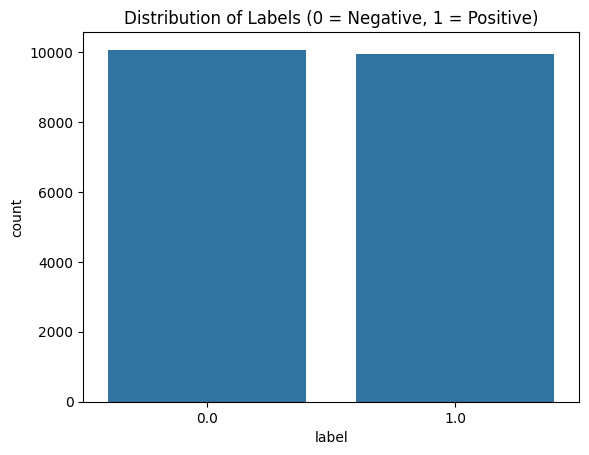

In [15]:
# Visualize the distribution of labels using Seaborn
import seaborn as sns

# Create a DataFrame for labels
labelDF = pd.DataFrame({'label': y_train})

# Plot countplot
sns.countplot(x='label', data=labelDF)
plt.title('Distribution of Labels (0 = Negative, 1 = Positive)')
plt.show()


In [6]:
# Split the data into a training set and validation set (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [7]:
# Create the DNN model
model = models.Sequential()
model.add(layers.Dense(50, activation="relu", input_shape=(10000,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

# Show model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                500050    
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-tr

In [8]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [9]:
# Early stopping to avoid overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [10]:
# Train the model
results = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=500,
    validation_data=(X_val, y_val),
    callbacks=[callback]
)


Epoch 1/10
40/40 [==============================] - 3s 41ms/step - loss: 0.4984 - accuracy: 0.7642 - val_loss: 0.3062 - val_accuracy: 0.8736
Epoch 2/10
40/40 [==============================] - 1s 20ms/step - loss: 0.2381 - accuracy: 0.9098 - val_loss: 0.2722 - val_accuracy: 0.8820
Epoch 3/10
40/40 [==============================] - 1s 20ms/step - loss: 0.1548 - accuracy: 0.9463 - val_loss: 0.3126 - val_accuracy: 0.8812
Epoch 4/10
40/40 [==============================] - 1s 20ms/step - loss: 0.1023 - accuracy: 0.9660 - val_loss: 0.3663 - val_accuracy: 0.8766
Epoch 5/10
40/40 [==============================] - 1s 20ms/step - loss: 0.0616 - accuracy: 0.9804 - val_loss: 0.4082 - val_accuracy: 0.8784
Epoch 6/10
40/40 [==============================] - 1s 21ms/step - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.4821 - val_accuracy: 0.8754
Epoch 7/10
40/40 [==============================] - 1s 22ms/step - loss: 0.0245 - accuracy: 0.9930 - val_loss: 0.5369 - val_accuracy: 0.8754
Epoch 8/10
40

In [11]:
# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, batch_size=500)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


50/50 [==============================] - 1s 14ms/step - loss: 0.7491 - accuracy: 0.8658
Test loss: 0.7490965723991394
Test accuracy: 0.8658400177955627


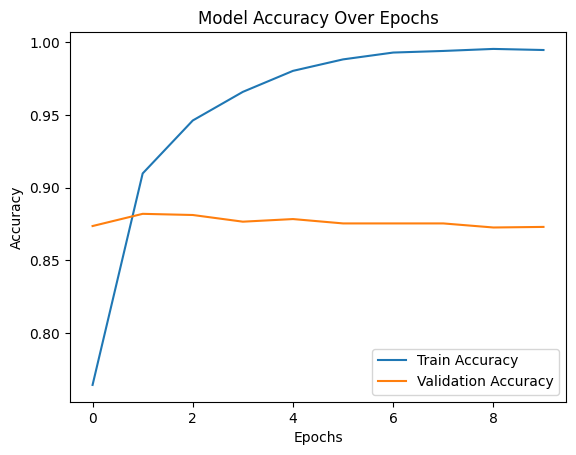

In [12]:
# Plot training and validation accuracy
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


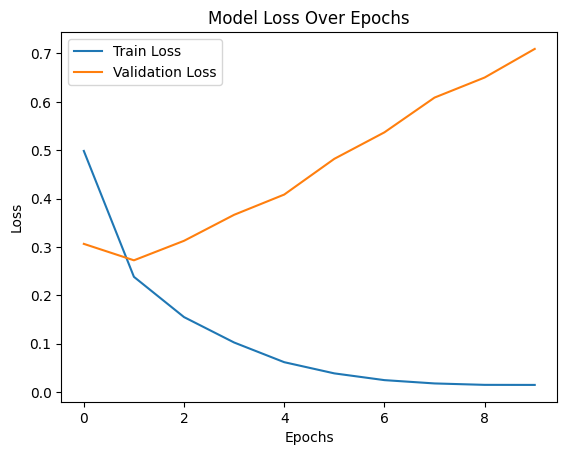

In [13]:
# Plot training and validation loss
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
# Mean Validation Accuracy
print("Mean Validation Accuracy:", np.mean(results.history["val_accuracy"]))


Mean Validation Accuracy: 0.8763600170612336
